<a href="https://colab.research.google.com/github/SPageot/pytorch-test/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

List

In [98]:
my_list = [[1,2,3,4,5],[6,7,8,9,10]]
my_list

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

Numpy Arrays

In [99]:
np1 = np.random.rand(3,4)
np1

array([[0.14864157, 0.80356783, 0.6625729 , 0.60008732],
       [0.66917124, 0.94856826, 0.30691652, 0.46000142],
       [0.49506499, 0.51527616, 0.9804264 , 0.24570567]])

In [100]:
np1.dtype

dtype('float64')

Tensor

In [101]:
tensor_2d = torch.randn(3,4)
tensor_2d

tensor([[ 0.1856, -0.7798, -1.4723, -1.8088],
        [-0.1287,  0.9819, -1.0504, -2.1112],
        [-1.6784, -1.0515,  0.1677, -1.3358]])

In [102]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [103]:
my_tensor = torch.tensor(np1)
my_tensor

tensor([[0.1486, 0.8036, 0.6626, 0.6001],
        [0.6692, 0.9486, 0.3069, 0.4600],
        [0.4951, 0.5153, 0.9804, 0.2457]], dtype=torch.float64)

Tensor Range


In [104]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Tensor Reshape

In [105]:
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [106]:
my_torch2 = torch.arange(15)
my_torch2

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [107]:
my_torch2 = my_torch2.reshape(3,-1)
my_torch2

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

Tensor View

In [108]:
my_torch3 = torch.arange(10)
my_torch3

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [109]:
my_torch4 = my_torch3.view(2,5)
my_torch4

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [110]:
my_torch5 = torch.arange(10)
my_torch5

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [111]:
my_torch6 = my_torch5.reshape(2,5)
my_torch6

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [112]:
my_torch5[1] = 13
my_torch5

tensor([ 0, 13,  2,  3,  4,  5,  6,  7,  8,  9])

In [113]:
my_torch6

tensor([[ 0, 13,  2,  3,  4],
        [ 5,  6,  7,  8,  9]])

Simple Neural Network

In [114]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x



In [115]:
torch.manual_seed(32)
model = Model()

In [116]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Read Raw Data with Pandas

In [117]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [118]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


Change variety names to numbers

In [119]:
df['variety'] = df['variety'].replace('Setosa', 0)
df['variety'] = df['variety'].replace('Versicolor', 1)
df['variety'] = df['variety'].replace('Virginica', 2)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Train Test Split

In [120]:
X = df.drop('variety', axis=1)
y = df['variety']

In [121]:
X = X.values
y = y.values

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32) #test size is 20% and training is 80%

Convert X features to float tensors

In [124]:
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)

Convert y labels to tensors long

In [125]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Set the Criterion of model to measure error, how far off are the predictions

In [126]:
criterion = nn.CrossEntropyLoss()


Choose Optimizer

In [127]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #lowering the lr(learning rate) will increase the time it takes for it to learn

In [128]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

Train our Model

Epoch (One run through all the training data in our network)

In [129]:
epochs = 300
losses = []

Do Back Propagation: As we get an error, we feed it back to the network to learn better

In [130]:
for i in range(epochs):
  y_pred = model.forward(X_train) # get predicted results
  loss = criterion(y_pred, y_train) # measure losses/ predicted values vs the y_train
  losses.append(loss.detach().numpy()) # keep track of our losses
  if i % 10 == 0:
    print(f'Epoch:{i} and loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss: 1.1699321269989014
Epoch:10 and loss: 0.9570867419242859
Epoch:20 and loss: 0.7980872392654419
Epoch:30 and loss: 0.6327950954437256
Epoch:40 and loss: 0.43861740827560425
Epoch:50 and loss: 0.2904532551765442
Epoch:60 and loss: 0.1778070479631424
Epoch:70 and loss: 0.11584124714136124
Epoch:80 and loss: 0.08936373889446259
Epoch:90 and loss: 0.0775291696190834
Epoch:100 and loss: 0.07132722437381744
Epoch:110 and loss: 0.06751003861427307
Epoch:120 and loss: 0.06487806141376495
Epoch:130 and loss: 0.06290555745363235
Epoch:140 and loss: 0.06134176254272461
Epoch:150 and loss: 0.06004923954606056
Epoch:160 and loss: 0.05894489586353302
Epoch:170 and loss: 0.057975877076387405
Epoch:180 and loss: 0.05710814148187637
Epoch:190 and loss: 0.056319478899240494
Epoch:200 and loss: 0.05559547618031502
Epoch:210 and loss: 0.05492578446865082
Epoch:220 and loss: 0.05430307239294052
Epoch:230 and loss: 0.053721774369478226
Epoch:240 and loss: 0.05317724496126175
Epoch:250 and l

Graphing the Errors

Text(0.5, 0, 'Epoch')

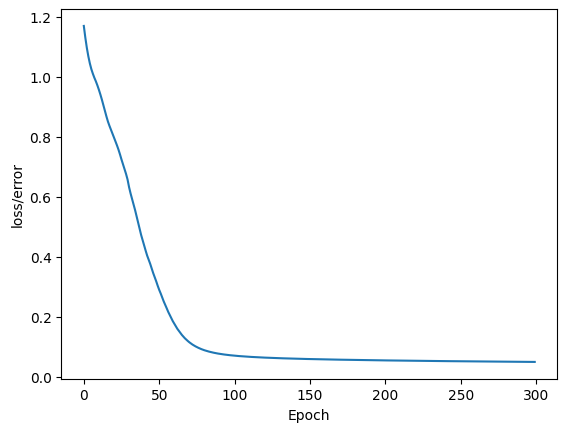

In [131]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [132]:
with torch.no_grad(): # Turns off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be our predictions
  loss = criterion(y_eval, y_test) # Find the loss

In [133]:
loss

tensor(0.0264)

In [134]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct')

1.) tensor([-5.1436,  6.4556,  0.7586]) 	 1 	 1
2.) tensor([ 10.6815,   2.2352, -15.5054]) 	 0 	 0
3.) tensor([  9.5895,   2.4865, -14.3356]) 	 0 	 0
4.) tensor([-5.6003,  6.6441,  1.0195]) 	 1 	 1
5.) tensor([-10.8951,   4.4018,   7.9402]) 	 2 	 2
6.) tensor([-12.2636,   5.2364,   8.6094]) 	 2 	 2
7.) tensor([  8.8277,   2.8432, -13.5672]) 	 0 	 0
8.) tensor([  9.8000,   2.3512, -14.4865]) 	 0 	 0
9.) tensor([-4.7408,  6.7165,  0.0850]) 	 1 	 1
10.) tensor([ 10.3452,   2.3034, -15.1372]) 	 0 	 0
11.) tensor([-5.7914,  7.1607,  0.9646]) 	 1 	 1
12.) tensor([-12.8446,   3.0404,  10.6511]) 	 2 	 2
13.) tensor([-2.2365,  6.2900, -2.0242]) 	 1 	 1
14.) tensor([-1.8320,  7.0033, -3.0051]) 	 1 	 1
15.) tensor([-11.0466,   4.1451,   8.1648]) 	 2 	 2
16.) tensor([-12.1498,   2.7849,  10.1504]) 	 2 	 2
17.) tensor([-5.8698,  5.8908,  1.8174]) 	 1 	 1
18.) tensor([-9.6396,  4.6607,  6.4567]) 	 2 	 2
19.) tensor([-2.3712,  6.7706, -2.2672]) 	 1 	 1
20.) tensor([ 11.1331,   2.3405, -16.1688]) 	 0 